In [1]:
import numpy as np
import statistics #Pacote básico de estatisticas do Python
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # organiza as datas no df de forma automática
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("IPCA - %a.m..xlsx", engine="openpyxl",index_col=0, parse_dates=["Data"])
df2 = pd.read_excel("IPCA - 12 meses (%a.m.).xlsx", engine="openpyxl",index_col=0, parse_dates=["Data"])
df3 = pd.read_excel("PIB Ac. 12 meses - R$ mi.xlsx", engine="openpyxl",index_col=0, parse_dates=["Data"])

In [3]:
df = df.merge(df2, on = "Data") \
                    .merge(df3, on = "Data")

In [4]:
df

,IPCA - %a.m.,Acumulado,Numero indice,IPCA - 12 meses (%a.m.),PIB Ac. 12 meses - R$ mi
Data,,,,,
2003-01-01,2.25,2.250000,34.078930,14.47,1502123.5
2003-02-01,1.57,2.285325,34.613969,15.85,1522029.5
2003-03-01,1.23,2.313434,35.039721,16.57,1543732.2
2003-04-01,0.97,2.335875,35.379606,16.77,1564349.5
2003-05-01,0.61,2.350124,35.595422,17.24,1580855.1
...,...,...,...,...,...
2021-08-01,0.87,6.339099,96.013210,9.68,8335657.7
2021-09-01,1.16,6.412633,97.126963,10.25,8433106.5
2021-10-01,1.25,6.492791,98.341050,10.67,8516030.1


In [5]:
data = pd.date_range("2003-01-01", periods = 228, freq = "MS")
ipca = df["IPCA - %a.m."]
ipca12 = df["IPCA - 12 meses (%a.m.)"]
pib = df["PIB Ac. 12 meses - R$ mi"]
numero_indice = df["Numero indice"]

In [6]:
#Função para definir a distribuição de frequência, prequel para o histograma
def ac(x) :
    at = max(x) - min(x)
    ki = round(np.sqrt(pd.Series.count(x)))
    h = round(at/ki,2)

    return "Amplitude total = " + str(at),"N. de classes = " + str(ki), "Amplitude de classes = " + str(h)

In [7]:
#Função da estatistica descritica
from scipy import stats

def stat_desc(x) :
    minx = "Mínimo: " + str(x.min())
    maxx = "Máximo: " + str(x.max())
    count = "Observações: " + str(len(x))
    median = "Mediana: " + str(statistics.median(x))
    var = "Variancia: " + str(statistics.variance(x))
    coefvar = "Coeficiente de Variação: " + str(stats.variation(x))
    ermed = "Erro Padrão da Média: " + str(stats.mstats.sem(x))
    mean = "Media: " + str(statistics.mean(x))
    desv = "Desvio Padrão: " + str(np.std(x))
    mad = "Desvio absoluto médio: " + str(pd.Series.mad(x))

    return print(count + "\n" 
                 + minx + "\n" 
                 + maxx + "\n" 
                 + mean + "\n" 
                 + median + "\n" 
                 + var + "\n" 
                 + coefvar + "\n"
                 + desv + "\n" 
                 + mad + "\n" 
                 + ermed + "\n")

In [8]:
# Teste de normalidade dos dados, QQ-Plot, Curtose e Shapiro-Wilk

def norm_test(x) :
    curtose = stats.kurtosis(x) #plotável, mas optei por não poluir mais o código
    base = 3
    if curtose == base :
        print("Curtose = %.3f," % curtose + " Distribuição Mesocurtica – A distribuiçao de frequências e a propria distribuição normal")
    elif curtose > 3 :
        print("Curtose = %.3f," % curtose + " Distribuição Leptocurtica – A distribuiçao é concentrada em torno da média (alta homogeneidade)")
    else:
         print("Curtose = %.3f," % curtose + " Distribuição Platicurtica – A distribuiçao é achatada (alta variabilidade)")

    print("\n")

    assim = stats.skew(x)
    base1 = 0
    if assim == base1 :
        print("Perfeitamente simetrica = %.3f," % assim)
    elif assim > base1 :
        print("Assimetria negativa = %.3f," % assim + "Concentração a esquerda da média")
    else:
        print("Assimetria positiva = %.3f," % curtose + " Concentração a direita da média")

# Teste de JARQUE-BERA, usando função de resposta para o resultado do teste.

    print("\n"+"Teste de Jarque-Bera")
    stat, p = stats.jarque_bera(x)
    print('Estatistica = %.3f, p-valor = %.10f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print("A amostra apresenta distribuição normal (Falha em rejeitar H0)")
    else:
        print("A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)")
        
# Teste de Shapiro-Wilk, usando a função de resposta para o resultado do teste.        
    print("\n"+"Teste de Shapiro")

    stat1,p1 = stats.shapiro(x)

    print('Estatistica = %.3f, p-valor = %.10f' % (stat1, p1))
    alpha = 0.05
    if p1 > alpha:
        print("A amostra apresenta distribuição normal (Falha em rejeitar H0)")
    else:
        print("A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)")
    
    #Refatorar o gráfico
    #sm.qqplot(x, line='45')

    return norm_test

In [9]:
#taxas de crescimento, PIB real e nominal

def txcresc (x):
    n=len(x)
    t=np.arange(1,n+1,1)
    y = np.array(x)
    ylog = np.log(y)
    curve = np.polyfit(t, ylog, 1)
    txp = ((x[-1]/x[0])-1)*100 #Taxa de crescimento nominal do período completo
    txma = ((x[-1]-x[0])/(x[0]*n))*100
    txmg = (((x[-1]/x[0])**(1/n))-1)*100
    txlog = round((curve[0] * 100),5)

    #Previsão com matemática financeira:
    vfxa = x[-1]*(1+(txma/100)) # aritmética
    vfxg = x[-1]*(1+(txmg/100)) #geométrica
    vfxlog = x[-1]*(1+(txlog/100))

    return print("Taxa de crescimento nominal = %.4f" % txp + "\n"
                 + "Taxa de crescimento média aritmética = %.4f" % txma
                 + "\n" + "Taxa de crescimento média geométrica = %.4f" % txmg
                 + "\n" + "Taxa de crescimento média log = %.4f" % txlog + "\n"
                 + "Previsão Aritmética = %.2f" % vfxa + "\n"
                 + "Previsão Geométrica = %.2f" % vfxg + "\n"
                 + "Previsão Log = %.2f" % vfxlog)

('Amplitude total = 2.63', 'N. de classes = 15', 'Amplitude de classes = 0.18')


Text(0.5, 1.0, 'Histograma e frequencia do IPCA')

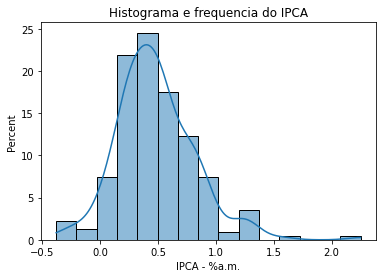

In [10]:
#Disposição dos histogramas com as distribuições, desconsiderando o ipca acumulado por ser uma variável acumulada
freq_ipca = ac(ipca)
k = round(np.sqrt(pd.Series.count(ipca))) #selecionar a variável de interesse antes de rodar o gráfico
print(freq_ipca)

sns.histplot(x=ipca,
             kde=True,
             legend=True,
             bins=k,
             stat="percent").set_title("Histograma e frequencia do IPCA")

('Amplitude total = 7172339.6', 'N. de classes = 15', 'Amplitude de classes = 478155.97') 



Text(0.5, 1.0, 'Histograma e frequencia do PIB')

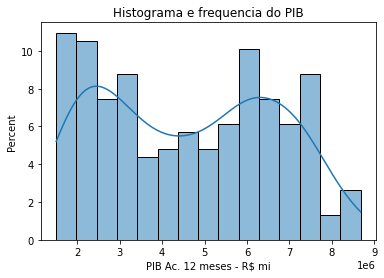

In [11]:
#Disposição dos histogramas com as distribuições, desconsiderando o ipca acumulado por ser uma variável acumulada
freq_pib = ac(pib)
print(freq_pib, "\n")

k = round(np.sqrt(pd.Series.count(pib)))
sns.histplot(x=pib,
             kde=True,
             legend=True,
             bins=k,
             stat="percent").set_title("Histograma e frequencia do PIB")

('Amplitude total = 4332501.3', 'N. de classes = 15', 'Amplitude de classes = 288833.42') 



Text(0.5, 1.0, 'Histograma e frequencia do PIB Real')

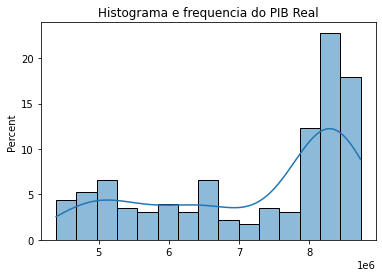

In [12]:
#Disposição do histogramas com as distribuições
pibr = round(((pib/numero_indice) * 100),2)
df["PIB Real"] = pibr

freq_pibr= ac(pibr) # reiterando o função de frequencia utilizada anteriormente
print(freq_pibr, "\n")

k = round(np.sqrt(pd.Series.count(pibr)))
sns.histplot(x=pibr,
             kde=True,
             legend=True,
             bins=k,
             stat="percent").set_title("Histograma e frequencia do PIB Real")

Text(0.5, 1.0, 'IPCA Acumulada - (%a.a.)')

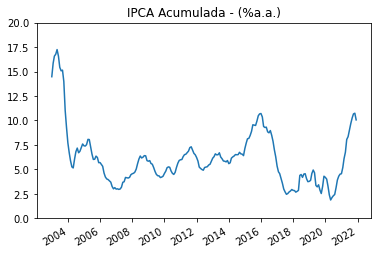

In [13]:
fig, ax = plt.subplots(1,1)

ax.plot(data,ipca12, linewidth = 1.5)
ax.set(ylim=(0.0, 20))
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
fig.autofmt_xdate()
ax.set_title('IPCA Acumulada - (%a.a.)')

Text(0.5, 1.0, 'Evolução PIB Nominal - 2003 a 2022 em R$')

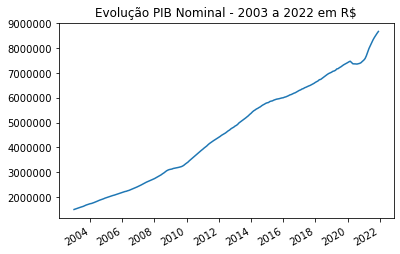

In [14]:
fig, ax = plt.subplots()

plt.ticklabel_format(style='plain')
ax.plot(data,pib, linewidth = 1.5)
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
fig.autofmt_xdate()
ax.set_title("Evolução PIB Nominal - 2003 a 2022 em R$")

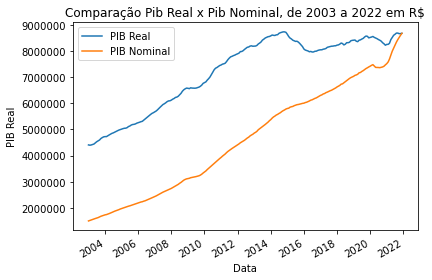

In [15]:
from textwrap import wrap
fig, ax = plt.subplots(1,1)

plt.ticklabel_format(style='plain')
sns.lineplot(data=df, x="Data", y="PIB Real",dashes=False, label = "PIB Real")
sns.lineplot(data=df, x="Data", y="PIB Ac. 12 meses - R$ mi", label = "PIB Nominal")
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
fig.autofmt_xdate()
ax.set_title("\n".join(wrap("Comparação Pib Real x Pib Nominal, de 2003 a 2022 em R$", 60)))
fig.tight_layout()

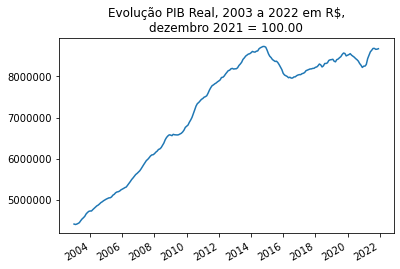

In [16]:
fig, ax = plt.subplots()

plt.ticklabel_format(style='plain')
ax.plot(data,pibr, linewidth = 1.5)
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
fig.autofmt_xdate()
title = ax.set_title("\n".join(wrap("Evolução PIB Real, 2003 a 2022 em R$, dezembro 2021 = 100.00", 40)))

In [17]:
stat_desc(pib)

Observações: 228
Mínimo: 1502123.5
Máximo: 8674463.1
Media: 4612423.487719298
Mediana: 4606582.65
Variancia: 4186918143477.958
Coeficiente de Variação: 0.4426531562520616
Desvio Padrão: 2041703.8148100893
Desvio absoluto médio: 1815480.5614035085
Erro Padrão da Média: 135512.64172720484



In [18]:
stat_desc(pibr)

Observações: 228
Mínimo: 4397153.95
Máximo: 8729655.25
Media: 7205619.678114035
Mediana: 7976591.65
Variancia: 1932879003660.3823
Coeficiente de Variação: 0.19252028838753493
Desvio Padrão: 1387227.9784414107
Desvio absoluto médio: 1241780.3247226076
Erro Padrão da Média: 92073.55477952678



In [19]:
stat_desc(ipca)

Observações: 228
Mínimo: -0.38
Máximo: 2.25
Media: 0.483640350877193
Mediana: 0.445
Variancia: 0.11593514761573538
Coeficiente de Variação: 0.7024744568443447
Desvio Padrão: 0.33974499279046444
Desvio absoluto médio: 0.25350530932594634
Erro Padrão da Média: 0.022549667171439563



In [20]:
stat_desc(ipca12)

Observações: 228
Mínimo: 1.88
Máximo: 17.24
Media: 6.1275
Mediana: 5.734999999999999
Variancia: 8.230336013215858
Coeficiente de Variação: 0.46716572100183423
Desvio Padrão: 2.8625579554387404
Desvio absoluto médio: 2.0085745614035084
Erro Padrão da Média: 0.18999464458306448



In [21]:
norm_test(pib)

Curtose = -1.313, Distribuição Platicurtica – A distribuiçao é achatada (alta variabilidade)


Assimetria negativa = 0.082,Concentração a esquerda da média

Teste de Jarque-Bera
Estatistica = 16.643, p-valor = 0.0002432549
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)

Teste de Shapiro
Estatistica = 0.937, p-valor = 0.0000000267
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)


<function __main__.norm_test(x)>

In [22]:
norm_test(pibr)

Curtose = -1.068, Distribuição Platicurtica – A distribuiçao é achatada (alta variabilidade)


Assimetria positiva = -1.068, Concentração a direita da média

Teste de Jarque-Bera
Estatistica = 28.190, p-valor = 0.0000007562
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)

Teste de Shapiro
Estatistica = 0.848, p-valor = 0.0000000000
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)


<function __main__.norm_test(x)>

In [23]:
norm_test(ipca)

Curtose = 3.008, Distribuição Leptocurtica – A distribuiçao é concentrada em torno da média (alta homogeneidade)


Assimetria negativa = 0.938,Concentração a esquerda da média

Teste de Jarque-Bera
Estatistica = 119.420, p-valor = 0.0000000000
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)

Teste de Shapiro
Estatistica = 0.954, p-valor = 0.0000011611
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)


<function __main__.norm_test(x)>

In [24]:
norm_test(ipca12)

Curtose = 3.528, Distribuição Leptocurtica – A distribuiçao é concentrada em torno da média (alta homogeneidade)


Assimetria negativa = 1.660,Concentração a esquerda da média

Teste de Jarque-Bera
Estatistica = 222.925, p-valor = 0.0000000000
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)

Teste de Shapiro
Estatistica = 0.860, p-valor = 0.0000000000
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)


<function __main__.norm_test(x)>

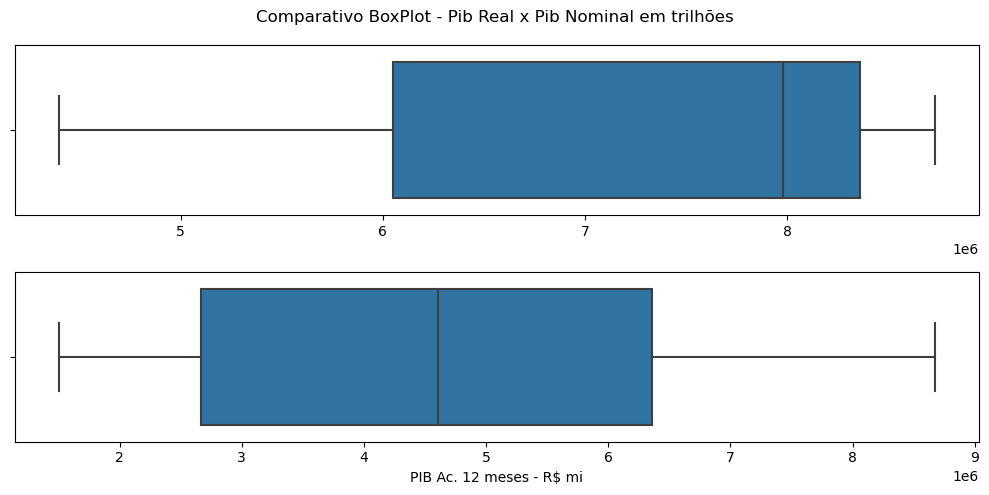

In [33]:
#Box-Plot do PIB real x PIB Nominal
fig, ax = plt.subplots(2)

fig.suptitle('Comparativo BoxPlot - Pib Real x Pib Nominal em trilhões')

sns.boxplot(data = df, x=pibr, ax=ax[0])
sns.boxplot(data = df, x=pib, ax=ax[1])

plt.tight_layout()

In [26]:
print("Variável PIB Nominal")
txcresc(pib)

print("\n")
print("Variável PIB Real")

txcresc(pibr)

print("\n")
print("Variável IPCA AC.")

txcresc(ipca12)

Variável PIB Nominal
Taxa de crescimento nominal = 477.4800
Taxa de crescimento média aritmética = 2.0942
Taxa de crescimento média geométrica = 0.7720
Taxa de crescimento média log = 0.7517
Previsão Aritmética = 8856124.63
Previsão Geométrica = 8741433.91
Previsão Log = 8739671.64


Variável PIB Real
Taxa de crescimento nominal = 96.7990
Taxa de crescimento média aritmética = 0.4246
Taxa de crescimento média geométrica = 0.2974
Taxa de crescimento média log = 0.2910
Previsão Aritmética = 8711291.15
Previsão Geométrica = 8700258.93
Previsão Log = 8699704.05


Variável IPCA AC.
Taxa de crescimento nominal = -30.4768
Taxa de crescimento média aritmética = -0.1337
Taxa de crescimento média geométrica = -0.1593
Taxa de crescimento média log = -0.1901
Previsão Aritmética = 10.05
Previsão Geométrica = 10.04
Previsão Log = 10.04


In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition, baseada no link time-series-analysis
pib_dec = seasonal_decompose(pibr, model='additive', extrapolate_trend="freq")

#construção do df com os valores da decomposição
plt.rcdefaults()

pib_dec_df = pd.concat([pib_dec.seasonal, pib_dec.trend, pib_dec.resid, pib_dec.observed], axis=1)
pib_dec_df.columns = ['sazonal', 'tendencia', 'residuo', 'valor nominal']
pib_dec_df

,sazonal,tendencia,residuo,valor nominal
Data,,,,
2003-01-01,-9421.411923,4.369316e+06,47882.954780,4407777.81
2003-02-01,-23002.627547,4.397746e+06,22410.672719,4397153.95
2003-03-01,-26351.018609,4.426176e+06,5839.026096,4405663.55
2003-04-01,-25832.605812,4.454605e+06,-7158.884386,4421613.69
2003-05-01,-22787.731501,4.483035e+06,-19071.706382,4441175.38
...,...,...,...,...
2021-08-01,22029.255471,8.428065e+06,231688.297455,8681782.11
2021-09-01,27868.680944,8.431628e+06,223063.306375,8682559.62
2021-10-01,26316.871043,8.435191e+06,198182.410668,8659689.99


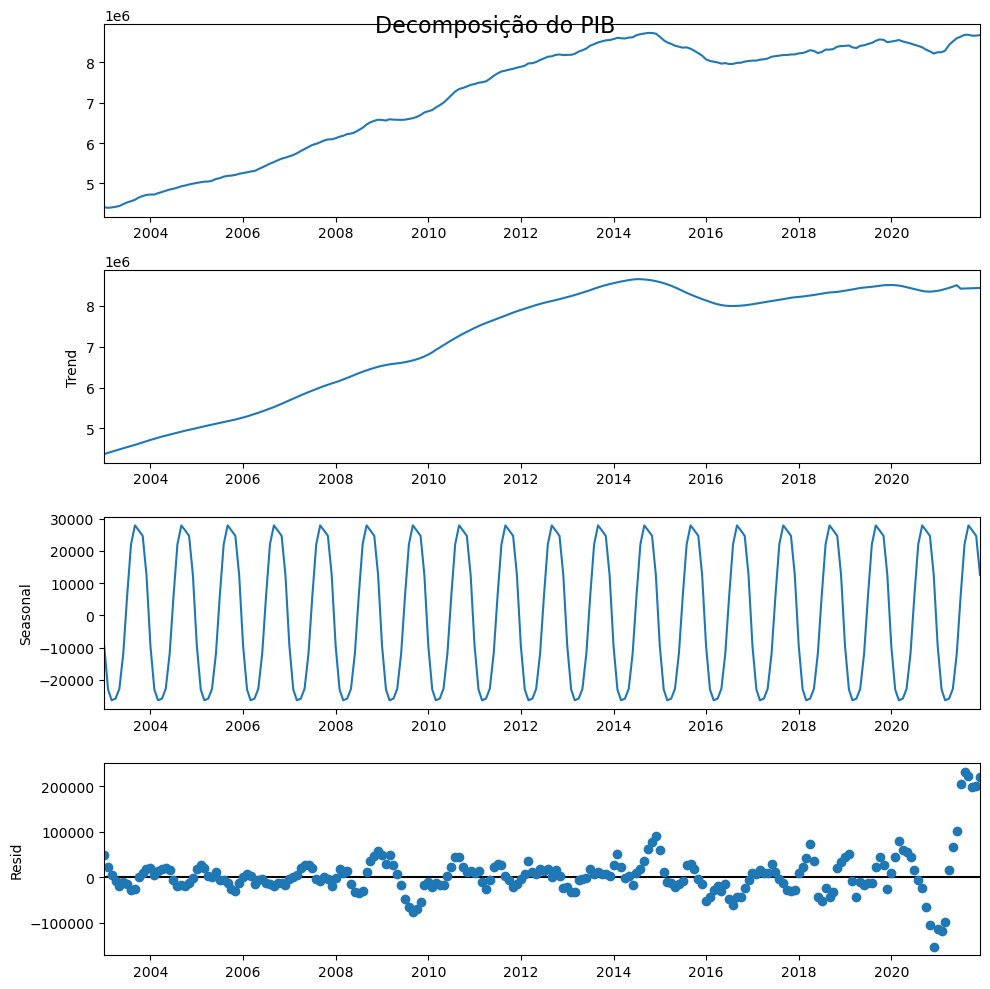

In [28]:
# Plotando a decomposição
plt.rcParams.update({'figure.figsize': (10,10)})
pib_dec.plot().suptitle('Decomposição do PIB', fontsize=16)

plt.rcdefaults()

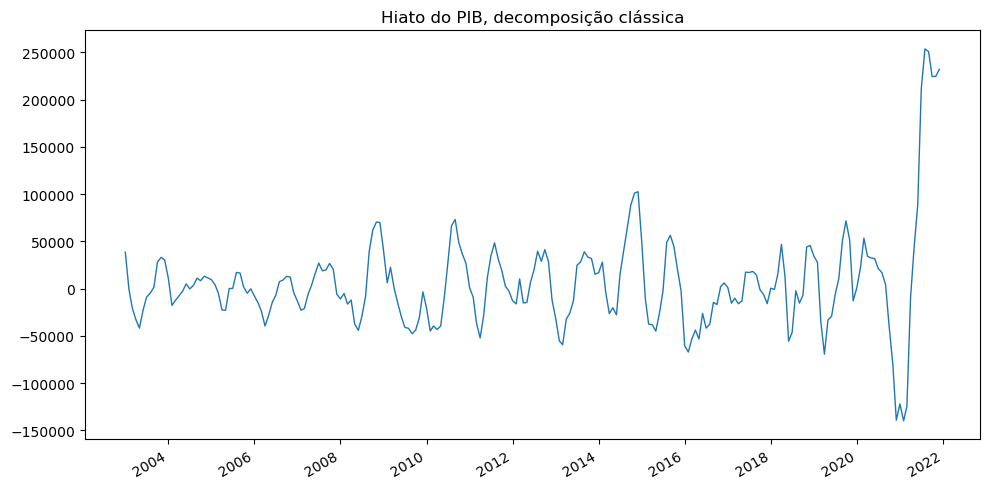

In [29]:
plt.rcParams.update({'figure.figsize': (10,5)})
#Hiato do PIB
pibh = pibr - pib_dec.trend

fig, ax = plt.subplots()

ax.plot(data,pibh, linewidth = 1.0)
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
fig.autofmt_xdate()
ax.set_title("\n".join(wrap("Hiato do PIB, decomposição clássica", 60)))
fig.tight_layout()

plt.rcdefaults()

Text(0.5, 1.0, 'Comparativo PIB Real x Tendencia, 2003 a 2021')

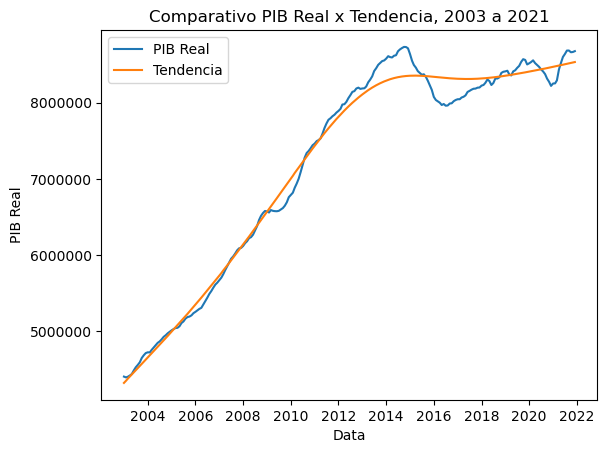

In [30]:
from statsmodels.tsa.filters.hp_filter import hpfilter
cycle,trend = hpfilter(pibr,129600)

pib_hp = df[['PIB Real']].copy()
pib_hp["cycle"] = cycle
pib_hp["tendencia"] = trend

fig, ax = plt.subplots(1,1)

plt.ticklabel_format(style='plain')
sns.lineplot(data=pib_hp, x="Data", y="PIB Real",dashes=False, label = "PIB Real")
sns.lineplot(data=pib_hp, x="Data", y="tendencia", label = "Tendencia")

ax.set_title("Comparativo PIB Real x Tendencia, 2003 a 2021")

<AxesSubplot:title={'center':'Hiato do produto, filtro HP. 2003 à 2021'}, xlabel='Data', ylabel='hiato'>

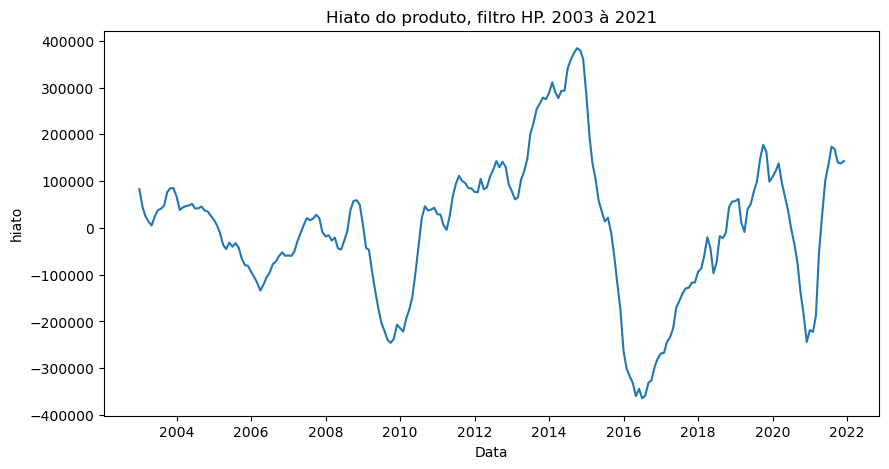

In [31]:
pib_hp["hiato"] = pibr - trend

plt.rcParams.update({'figure.figsize': (10,5)})
fig,ax = plt.subplots(1,1)
ax.set_title("Hiato do produto, filtro HP. 2003 à 2021")
sns.lineplot(data=pib_hp, x="Data", y="hiato",dashes=False)